# Grocery Stores in Los Angeles County

This is an updated version for the grocery notebook I created for the midterm. A lot of unnecessary codes are deleted, a function is added, and things need to be worked on are noted.

**Import libraries.**

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


**Import file.**

In [2]:
gs = gpd.read_file('GroceryStores.geojson')

**Look at the basic information of the dataset, then trim down the columns with the ones needed.**

In [3]:
#look at general info of the dataset
gs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store_Name          1377 non-null   object  
 1   Store_Chain         1377 non-null   object  
 2   Street_Number       1377 non-null   object  
 3   Street_Name         1377 non-null   object  
 4   Additional Address  1377 non-null   object  
 5   City                1377 non-null   object  
 6   Zip_Code            1377 non-null   object  
 7   Latitude            1377 non-null   object  
 8   Longitude           1377 non-null   object  
 9   geometry            1377 non-null   geometry
dtypes: geometry(1), object(9)
memory usage: 107.7+ KB


In [4]:
#choose the desired colums
desired_columns = ['Store_Name','Store_Chain','Street_Number','Street_Name', 'Additional Address','City','Zip_Code','Latitude','Longitude']
gs[desired_columns].sample(5)

Store_Name  Store_Chain Street_Number          Street_Name  \
769     SAV ON DRUG  9672  Sav_on_drug         14503          Ramona Blvd   
1041  Target Store T-0199       Target          1200     N Sepulveda Blvd   
535   Northgate Market 35    Northgate         10801        S Prairie Ave   
129            Aldi 79085         Aldi           740  W Rancho Vista Blvd   
1099     TRADER JOE'S  55  Trader_joes          1566        Colorado Blvd   

     Additional Address             City Zip_Code  Latitude  Longitude  
769                         Baldwin Park    91706  34.08696   -117.959  
1041                     Manhattan Beach    90266  33.88837  -118.3959  
535                            Inglewood    90303  33.93736   -118.344  
129                             Palmdale    93551  34.60165  -118.1452  
1099                          Eagle Rock    90041  34.13945  -118.2001

In [5]:
#create a variable with only the desired columns
gs_trimmed = gs[desired_columns].copy()
gs_trimmed

Store_Name      Store_Chain Street_Number  \
0           99 Ranch Market 38  99 Ranch Market           345   
1           99 RANCH MARKET 17  99 Ranch Market         17713   
2           99 Ranch Market 18  99 Ranch Market          1625   
3            99 RANCH MARKET 7  99 Ranch Market          1300   
4            99 Ranch Market 3  99 Ranch Market          1015   
...                        ...              ...           ...   
1372  Whole Foods Market 10177      Whole_Foods          6350   
1373  Whole Foods Market 10536      Whole_Foods         12746   
1374  Whole Foods Market 10545      Whole_Foods          3401   
1375  Whole Foods Market 10383      Whole_Foods           500   
1376  Whole Foods Market 10173      Whole_Foods          2201   

            Street_Name Additional Address              City Zip_Code  \
0             E Main St                             Alhambra    91801   
1          Pioneer Blvd                              Artesia    90701   
2           S Azusa Ave                     Hacienda Heights    91745   
3     S Golden West Ave                              Arcadia    91007   
4          S Nogales St                      Rowland Heights    91748   
...                 ...                ...               ...      ...   
1372           W 3rd St                          Los Angeles    90036   
1373   W Jefferson Blvd                          Playa Vista    90094   
1374        W Olive Ave                              Burbank    91505   
1375      Wilshire Blvd                         Santa Monica    90401   
1376      Wilshire Blvd                         Santa Monica    90403   

      Latitude  Longitude  
0     34.09719  -118.1227  
1     33.87005  -118.0824  
2     33.99284  -117.9318  
3     34.12338  -118.0597  
4     33.99646  -117.8884  
...        ...        ...  
1372  34.07133  -118.3603  
1373  33.97406  -118.4257  
1374  34.15423  -118.3369  
1375  34.01985  -118.4973  
1376  34.03286  -118.4814  

[1377 rows x 9 columns]

**Create a static map plotted with all the grocery chain stores in LA County.**

In [6]:
#convert data to geod dataframe
gdf = gpd.GeoDataFrame(gs_trimmed, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gs_trimmed.Longitude, gs_trimmed.Latitude))

In [7]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
#reproject to web mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

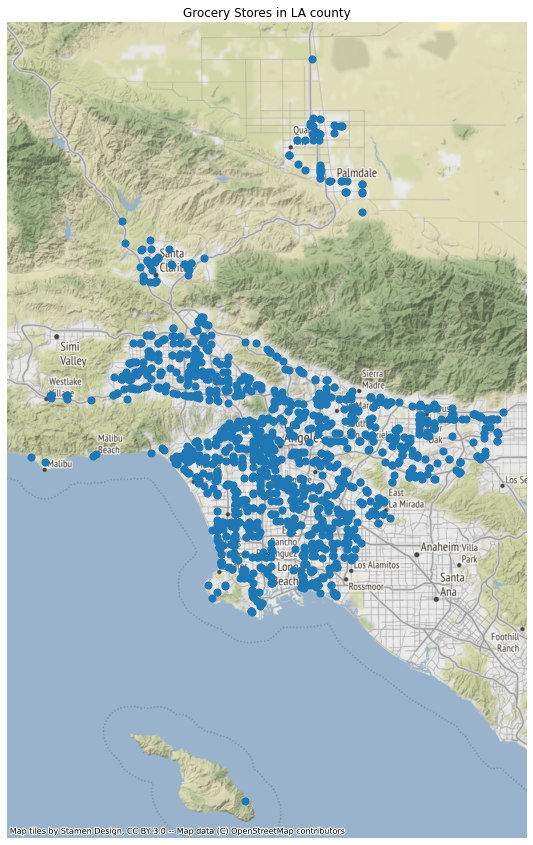

In [9]:
#Plot it
fig, ax = plt.subplots(figsize=(20,15))

gdf_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50
                )

ax.axis('off')

ax.set_title('Grocery Stores in LA county')

ctx.add_basemap(ax)

In [10]:
#Convert the data type of "Latitude" and Longitude" from string to float for mapping.
gs_trimmed['Latitude'] = gs_trimmed['Latitude'].astype(float)
gs_trimmed['Longitude'] = gs_trimmed['Longitude'].astype(float)
gs_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1377 entries, 0 to 1376
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Store_Name          1377 non-null   object  
 1   Store_Chain         1377 non-null   object  
 2   Street_Number       1377 non-null   object  
 3   Street_Name         1377 non-null   object  
 4   Additional Address  1377 non-null   object  
 5   City                1377 non-null   object  
 6   Zip_Code            1377 non-null   object  
 7   Latitude            1377 non-null   float64 
 8   Longitude           1377 non-null   float64 
 9   geometry            1377 non-null   geometry
dtypes: float64(2), geometry(1), object(7)
memory usage: 107.7+ KB


**Create interactive maps.**

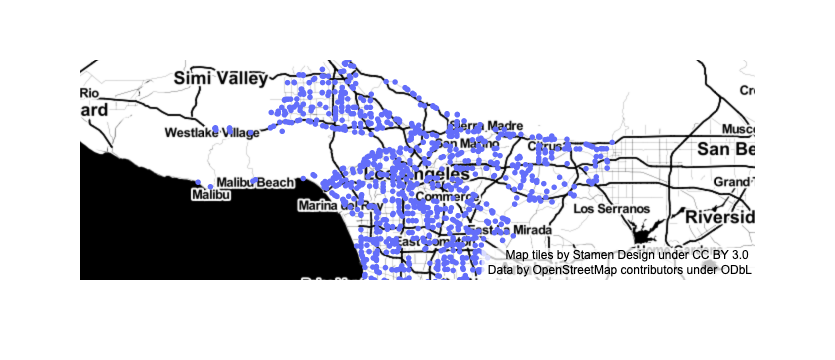

In [11]:
#plot it with scatter mapbox
fig = px.scatter_mapbox(gs_trimmed,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="stamen-toner")
fig.show()

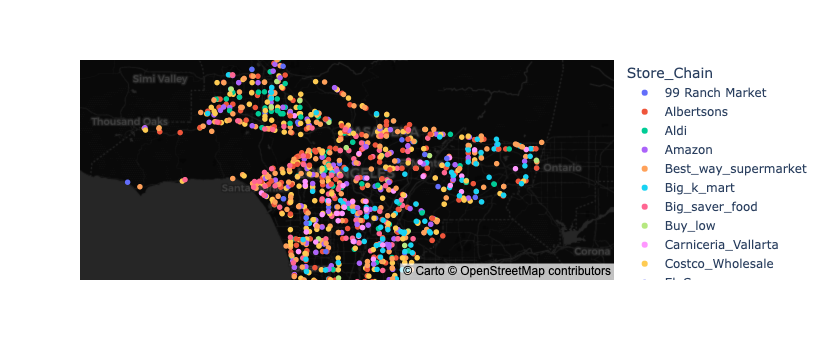

In [12]:
#plot all the chains with color codes.
fig = px.scatter_mapbox(gs_trimmed, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Store_Chain",
                        labels={'Store_chain':'Store_chain'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

In [18]:
fig.write_html("grocery_stores_plotly.html")

**Create a function and a loop to produce maps of each chain.**

In [13]:
#create a variable for the store chains
chain_list = gdf.Store_Chain.value_counts().head(47).index.tolist()
chain_list

['Ralphs',
 'Vons',
 'Smart&final',
 'Albertsons',
 'Target',
 'Mother_Nutrition',
 'Trader_joes',
 'Food_4_Less',
 'Walmart',
 'Fresh&Easy',
 'Sav_on_drug',
 'Superior_grocers',
 'Whole_Foods',
 'Numero_uno',
 'Stater_bros',
 'El_Super',
 'Sprouts',
 'Vallarta',
 'Aldi',
 'Costco_Wholesale',
 'Northgate',
 'Haggen',
 'Jons',
 'Gelsons',
 'Grocery_Outlet',
 'Kmart',
 'Super_A_food',
 'Big_saver_food',
 'Payless_food',
 'Best_way_supermarket',
 'Big_k_mart',
 '99 Ranch Market',
 'Sams_club',
 'Top_valu',
 'Buy_low',
 'Valu_plus',
 'Island_Pacific',
 'Seafood_city',
 'H_mart',
 'Gigante',
 'R_ranch',
 'Super_king',
 'Hows',
 'Hong_kong_supermarket',
 'Amazon',
 'Carniceria_Vallarta',
 'Galleria']

In [14]:
#set boundaries for the plots
nbound = max(gdf.Latitude)
sbound = min(gdf.Latitude)
ebound = max(gdf.Longitude)
wbound = min(gdf.Longitude)

xlimit = (wbound, ebound)
ylimit = (sbound, nbound)

In [15]:
#define it
def chain_by (Store_Chain='Trader_joes'):
    
    # map
    ax = gdf[gdf.Store_Chain == Store_Chain].plot(color='yellow',markersize=10)
    plt.ylim(sbound, nbound) # set y limits of plot
    plt.xlim(wbound, ebound)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(Store_Chain + ' (' + str(gdf[gdf.Store_Chain == Store_Chain].shape[0]) + ' stores)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326',
                    source=ctx.providers.CartoDB.DarkMatter)

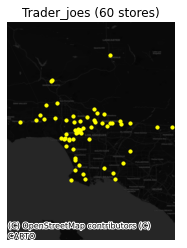

In [16]:
#test the definition.
chain_by()

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:658: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



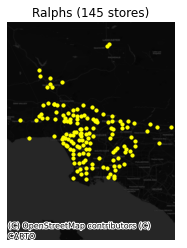

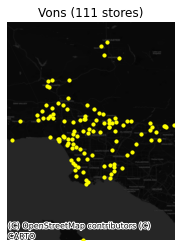

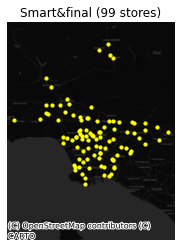

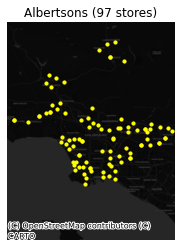

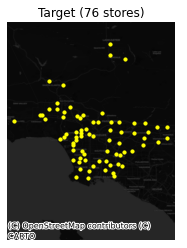

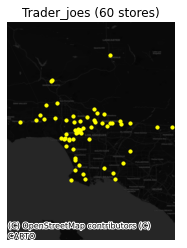

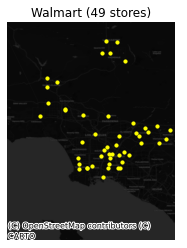

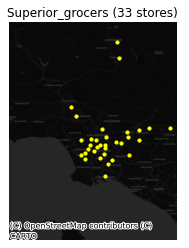

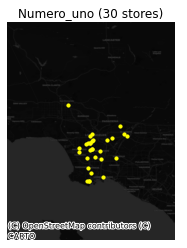

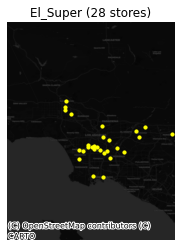

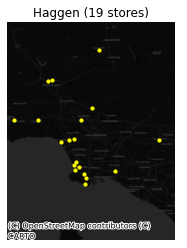

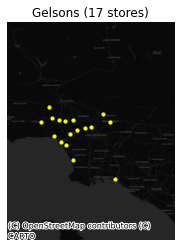

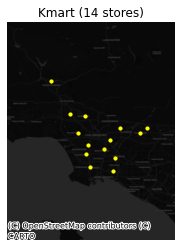

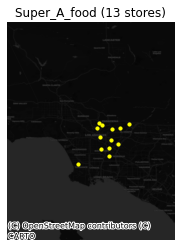

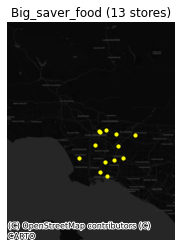

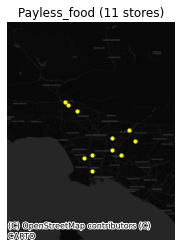

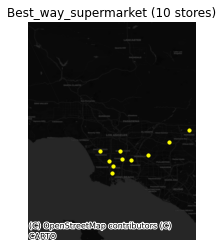

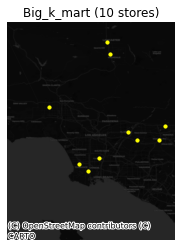

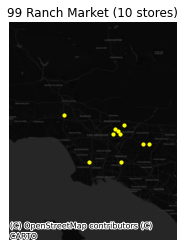

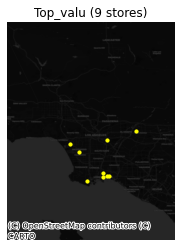

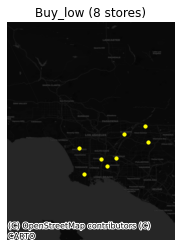

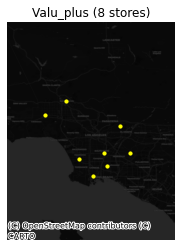

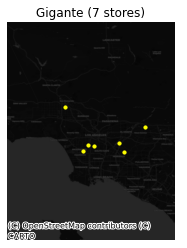

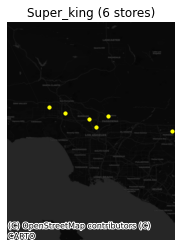

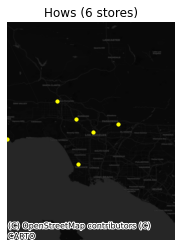

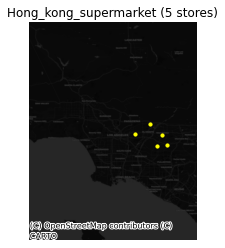

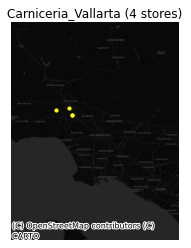

In [17]:
#loop all the store chains.
for Store_Chain in chain_list:
    chain_by(Store_Chain = Store_Chain)

# Author: Jinglan Lin